# Decision Trees and Random Forests in Python

In [1]:
import pandas as pd #for data munging
import numpy as np # for mathematicla operations
from collections import Counter # like table function in R
import matplotlib.pyplot as plt # for visualization
import seaborn as sns# for visualization
%matplotlib inline

In [2]:
#read the train data
train=pd.read_csv("C:\\Users\\robotics\\Desktop\\git\\de\\Day5\\Network_Intrusion_Train_data.csv")
#read the test data
test=pd.read_csv("C:\\Users\\robotics\\Desktop\\git\\de\\Day5\\Network_Intrusion_Validate_data.csv")

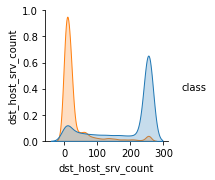

In [3]:
sns.pairplot(train[['dst_host_srv_count','class']],hue="class")

In [4]:
#merge the 2 dataframes
all=pd.concat([train,test],axis=0)
all.reset_index(inplace=True,drop=True)

In [5]:
all.shape

(47736, 42)

In [6]:
all.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [7]:
all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47736 entries, 0 to 47735
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     47736 non-null  int64  
 1   protocol_type                47736 non-null  object 
 2   service                      47736 non-null  object 
 3   flag                         47736 non-null  object 
 4   src_bytes                    47736 non-null  int64  
 5   dst_bytes                    47736 non-null  int64  
 6   land                         47736 non-null  int64  
 7   wrong_fragment               47736 non-null  int64  
 8   urgent                       47736 non-null  int64  
 9   hot                          47736 non-null  int64  
 10  num_failed_logins            47736 non-null  int64  
 11  logged_in                    47736 non-null  int64  
 12  num_compromised              47736 non-null  int64  
 13  root_shell      

In [8]:
all.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [9]:
all.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,47736.000000,4.773600e+04,4.773600e+04,47736.000000,47736.000000,47736.000000,47736.000000,47736.000000,47736.000000,47736.000000,...,47736.000000,47736.000000,47736.000000,47736.000000,47736.000000,47736.000000,47736.000000,47736.000000,47736.000000,47736.000000
mean,264.347285,1.774954e+04,2.813757e+03,0.000189,0.016507,0.000356,0.154286,0.010851,0.417169,0.176869,...,187.886291,127.194319,0.561790,0.086317,0.140278,0.026080,0.197021,0.194640,0.172387,0.169733
std,2178.505660,1.781220e+06,6.616178e+04,0.013730,0.213064,0.025481,1.690612,0.108927,0.493097,9.068051,...,96.848516,111.921285,0.444949,0.203750,0.307468,0.099666,0.385606,0.388126,0.351446,0.363230
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,99.000000,12.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.500000e+01,3.600000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,98.000000,0.760000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.840000e+02,5.990000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.040000,0.010000,0.020000,0.000000,0.020000,0.000000
max,57715.000000,3.817091e+08,5.151385e+06,1.000000,3.000000,3.000000,101.000000,4.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
all.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'class'],
      dtype='object')

In [11]:
all.select_dtypes(include=['object']).head()# to see all categorical columns
#df.select_dtypes(include=[np.number]) # to see all numerical/ continuous columns

,protocol_type,service,flag,class
0,tcp,ftp_data,SF,normal
1,udp,other,SF,normal
2,tcp,private,S0,anomaly
3,tcp,http,SF,normal
4,tcp,http,SF,normal


In [12]:
print (all['class'].value_counts())
print("\n") # print a eppty line
print (Counter(all['class']))

anomaly    24576
normal     23160
Name: class, dtype: int64


Counter({'anomaly': 24576, 'normal': 23160})


C:\Users\robotics\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='class', ylabel='count'>

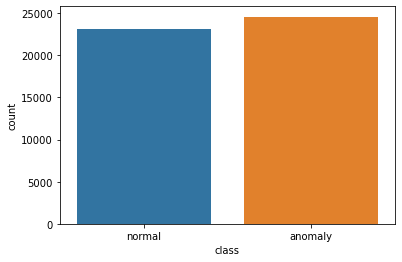

In [13]:
sns.countplot(all['class'])

C:\Users\robotics\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='protocol_type', ylabel='count'>

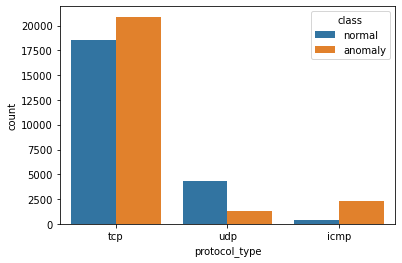

In [14]:
sns.countplot("protocol_type",hue="class",data=all)
# what odes this tell us?
# is Protocol type important?
#yes esp udp and icmp as most of them are normal & anamaly repectively

C:\Users\robotics\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='service', ylabel='count'>

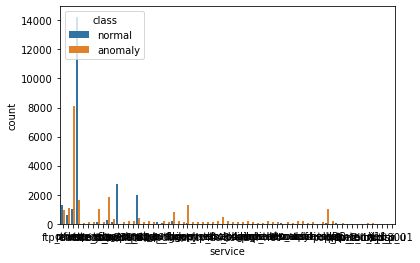

In [15]:
sns.countplot("service",hue="class",data=all)

In [16]:
all['service'].value_counts()

http         15856
private       9125
domain_u      2714
smtp          2383
ftp_data      2247
             ...  
tim_i            8
urh_i            4
red_i            3
tftp_u           1
http_8001        1
Name: service, Length: 67, dtype: int64

C:\Users\robotics\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='flag', ylabel='count'>

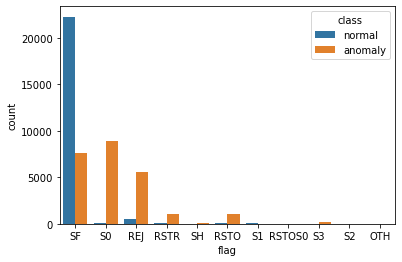

In [17]:
sns.countplot("flag",hue="class",data=all)

In [18]:
all['flag'].value_counts()

SF        29848
S0         9022
REJ        6066
RSTR       1166
RSTO       1077
S3          264
SH          116
S1          109
S2           36
RSTOS0       23
OTH           9
Name: flag, dtype: int64

In [19]:
# let us run a normal decision tree using all variables
from sklearn.tree import DecisionTreeClassifier

In [20]:
dtree = DecisionTreeClassifier()

In [21]:
dum_df=pd.get_dummies(all['class'],drop_first=True)
dum1=pd.get_dummies(all['flag'],drop_first=True)
dum2=pd.get_dummies(all['service'],drop_first=True)
dum3=pd.get_dummies(all['protocol_type'],drop_first=True)
df_new=pd.concat([all,dum1,dum2,dum3],axis=1)

In [22]:
#split data back into the same train and test
train_new=df_new.head(len(train))#split back into original train and test
test_new=df_new.tail(len(test))

In [23]:
X_train=train_new.drop(['class','service','flag','protocol_type'],axis=1)
y_train=train_new['class']
X_test=test_new.drop(['class','service','flag','protocol_type'],axis=1)
y_test=test_new['class']

In [24]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

# Prediction and Evaluation

In [25]:
predictions = dtree.predict(X_test)

In [26]:
from sklearn.metrics import classification_report,confusion_matrix

In [27]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

     anomaly       0.92      0.73      0.81     12833
      normal       0.72      0.92      0.81      9711

    accuracy                           0.81     22544
   macro avg       0.82      0.82      0.81     22544
weighted avg       0.84      0.81      0.81     22544



In [28]:
print(confusion_matrix(y_test,predictions))

[[9358 3475]
 [ 780 8931]]


# Random Forests

In [29]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=500,random_state=0)

#regressor = RandomForestRegressor(n_estimators=20, random_state=0)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500, random_state=0)

In [30]:
rfc_pred = rfc.predict(X_test)

In [31]:
print(confusion_matrix(y_test,rfc_pred))

[[7984 4849]
 [ 266 9445]]


In [32]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

     anomaly       0.97      0.62      0.76     12833
      normal       0.66      0.97      0.79      9711

    accuracy                           0.77     22544
   macro avg       0.81      0.80      0.77     22544
weighted avg       0.84      0.77      0.77     22544

